# Исследование инвариантов для различных функционалов (медианы)

### Задача: исследовать зависимость различных функционалов (рассматриваемых как многомерную медиану) от системы координат.

Рассмотрим несколько функционалов для заданной выборки $D = \{x_i, y_i\}_{i}$, где $a = (a_x, a_y)$ -- решние задачи:

$M \rightarrow \min$

Выпишем функционалы:

$M_0(a_x, a_y, D) = \sum\limits_{i} \big(|x_i-a_x| + |y_i-a_y|\big)$

$M_1(a_x, a_y, D) = \sum\limits_{i} \big(|x_i-a_x|^d + |y_i-a_y|^d\big)^{1/d}$, где $d = 2$

$M_2(a_x, a_y, D) = \sum\limits_{i} \max\big(|x_i-a_x|, |y_i-a_y|\big)$

$M_3(a_x, a_y, D) = \sum\limits_{i} \big(|x_i-a_x| \cdot|y_i-a_y|\big)$

Очевидно, что в одномерном случае, они совпадают с классической медианой.

Проведём некоторые эксперименты. Возьмём несколько точек и для них найдём перебором по регулярной сетке решение. Кроме того, посмотрим, при каких значениях  (т.е. в какой системе координат) достигается наименьшее значение функционала. Стоит отметить, что $M_1(d) \rightarrow M_2$ при  $d \rightarrow \infty$, результаты для них будут близкими. (Фихтенгольц, Курс дифференциального исчисления 1 том)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Выборка
data = np.array([
    [1, 1],
    [3, 5],
    [4, 6]
])
# Ограничения на оси
min_x = -10
min_y = -10
max_x = 10
max_y = 12
count_x = 50
count_y = 50

# Функционалы
d2 = 2.
metrics = [
    lambda x, y, data: np.sum(np.abs(data[:, 0] - x)  + np.abs(data[:, 1] - y)),
    lambda x, y, data: np.sum((np.abs(data[:, 0] - x) ** d2 + np.abs(data[:, 1] - y) ** d2)**(1./d2)),
    lambda x, y, data: np.sum(np.max(
        np.vstack([
            np.abs(data[:, 0] - x), 
            np.abs(data[:, 1] - y),
        ]), axis=1
    )),
    lambda x, y, data: np.sum(np.abs(data[:, 0] - x) * np.abs(data[:, 1] - y)),
]
rotate = lambda fi: np.array([
    [np.cos(fi), -np.sin(fi)],
    [np.sin(fi), np.cos(fi)]
])

# Подсчёт и отрисовка
def calculate_metrics(scale, shift, rotate, fi, metric_number, draw):
    data_ = np.dot(np.dot(data - shift, rotate(fi)), scale)
    z = []
    for y in np.linspace(min_y, max_y, count_y):
        z.append([])
        for x in np.linspace(min_x, max_x, count_x):
            z[-1].append(metrics[metric_number](x, y, data_))
    x, y = np.meshgrid(np.linspace(min_x, max_x, count_x), np.linspace(min_y, max_y, count_y))
    
    if draw:
        plt.figure()
        plt.contour(x,y, np.array(z));
        plt.plot(data_[:, 0], data_[:, 1], 'rx')
        plt.plot(0, 0, 'bo')
        plt.title(
            'Линии уровня для функционала M%d\n при\nfi=%.2f,\nshift=[%.2f, %.2f],\nscale=[\n[%.2f %.2f],\n[%.2f %.2f]\n]' %
            (
                metric_number, 
                fi,
                shift[0], shift[1],
                scale[0, 0], scale[0, 1], scale[1, 0], scale[1, 1]
            )
        )
        plt.legend(['Выборка', 'Нуль'])
    z = np.array(z)
    opt_x, opt_y = np.where(z == np.min(z))
    opt_x, opt_y = opt_x[0], opt_y[0]
    return np.min(z), x[0][opt_x], y[opt_y][0]

# Функционал $M_0(a_x, a_y, D) = \sum\limits_{i} \big(|x_i-a_x| + |y_i-a_y|\big)$

Построим несколько графиков для $M_5$, руками меняя угол поворота исходной системы координат. Точки были выбраны так, чтобы их повороты относительно нуля (обозначен синим) явно прослеживались. 

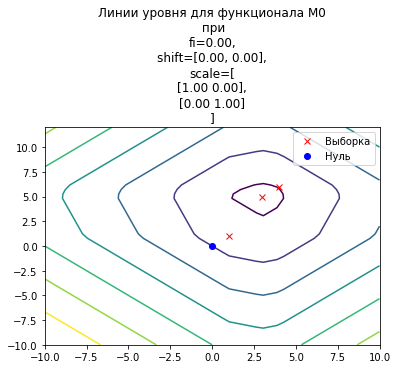

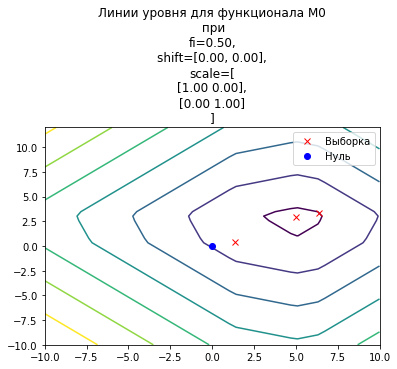

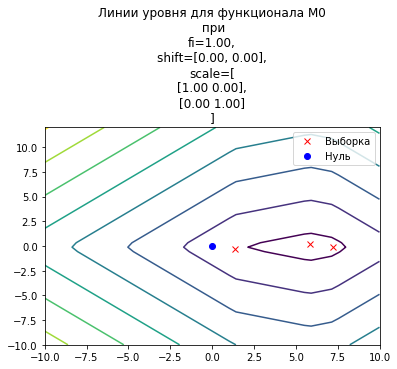

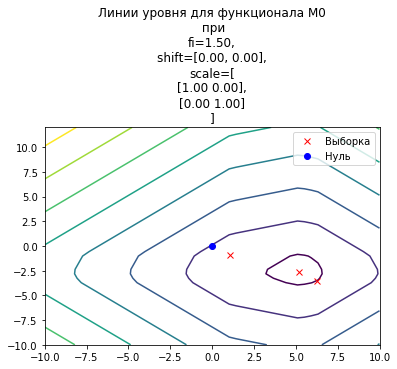

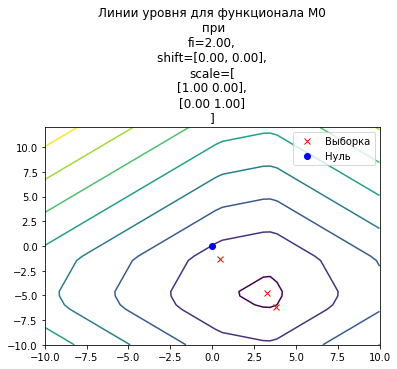

In [2]:
scale = np.array([
    [1, 0],
    [0, 1]
])
fi = [0, 0.5, 1, 1.5, 2]
shift = np.array([0, 0])
metric_number = 0
for fi_ in fi:
    calculate_metrics(scale, shift, rotate, fi_, metric_number=metric_number, draw=True);

Видно, что вслед за поворотом точек (системы координат), меняется и поверхность функционала. Она остаётся монотонной, но сжимается, разжимается и перемещается (видимо, аффинно). Теперь попробуем при фиксированном угле поворота $\phi=0$ менять коэффициенты сжатия (для одной из осей). Для второй -- аналогично:

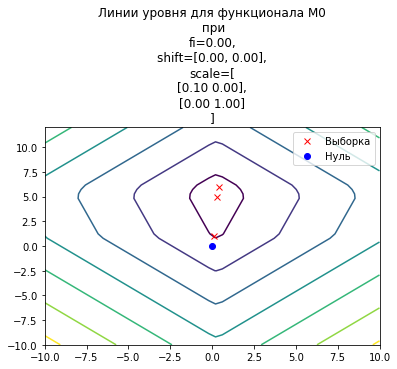

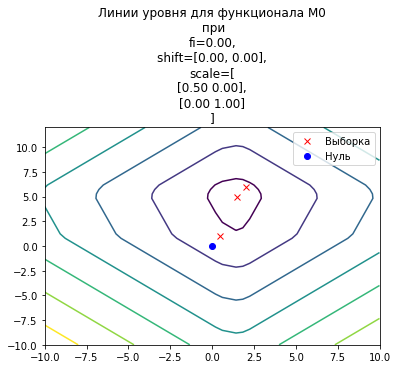

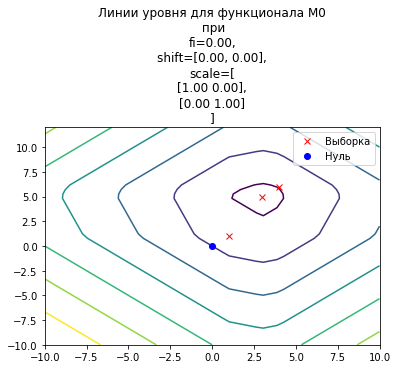

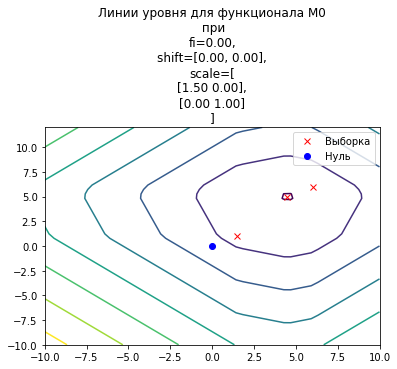

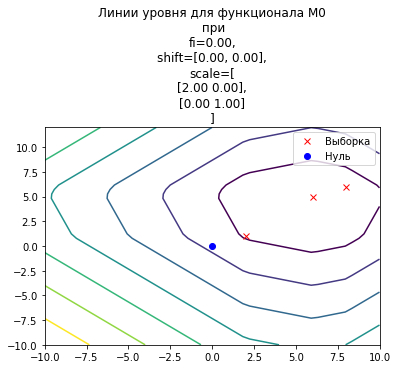

In [3]:
scale = [
    np.array([
        [0.1, 0],
        [0, 1]
    ]),
    np.array([
        [0.5, 0],
        [0, 1]
    ]),
    np.array([
        [1, 0],
        [0, 1]
    ]),
    np.array([
        [1.5, 0],
        [0, 1]
    ]),
    np.array([
        [2, 0],
        [0, 1]
    ]),
]
fi = 0
shift = np.array([0, 0])
metric_number = 0
for scale_ in scale:
    calculate_metrics(scale_, shift, rotate, fi, metric_number=metric_number, draw=True);

Вывод точно такой же для метрики $M_5$ есть зависимость функционала от системы координат. К сдвигу, очевидно (как из формул, так и из графиков), нет инварианта. Строить графики не будем.
 
Ровно аналогичные графики можно получить и для других функционалов. Построим по одному для каждого.

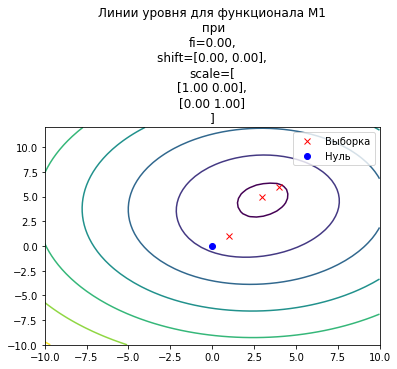

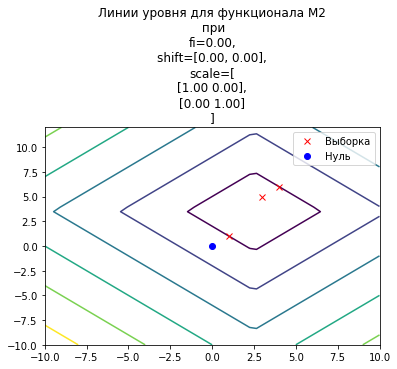

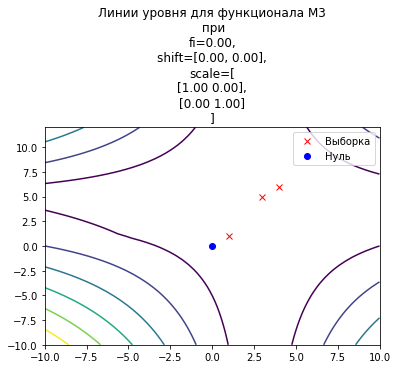

In [4]:
scale = np.array([
    [1, 0],
    [0, 1]
])
fi = 0
shift = np.array([0, 0])
calculate_metrics(scale, shift, rotate, fi, metric_number=1, draw=True);
calculate_metrics(scale, shift, rotate, fi, metric_number=2, draw=True);
calculate_metrics(scale, shift, rotate, fi, metric_number=3, draw=True);

Теперь, в качестве эксперимента, построим зависимость положения минимального значения функционало от различных параметров.

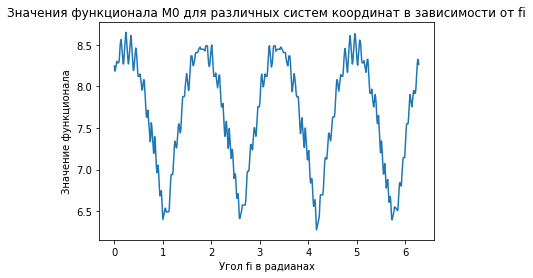

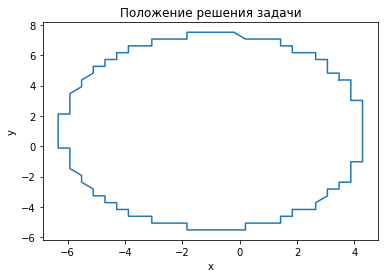

In [5]:
scale = np.array([
    [1, 0],
    [0, 1]
])
fi = np.arange(0, 2 * np.pi, 0.01)
shift = np.array([0, 0])
metric_number = 0
x = []
y = []
metric = []
for fi_ in fi:
    opt_metric, opt_x, opt_y = calculate_metrics(scale, shift, rotate, fi_, metric_number=metric_number, draw=False);
    metric.append(opt_metric)
    x.append(opt_x)
    y.append(opt_y)
plt.figure()
plt.plot(fi, metric)
plt.xlabel('Угол fi в радианах')
plt.ylabel('Значение функционала')
plt.title('Значения функционала M0 для различных систем координат в зависимости от fi')
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Положение решения задачи');

Как для текущих данных, так и для других, будем иметь периодичную функцию с 4 периодами для $\phi \in [0, 2\pi]$. Данный факт установлен в рамках экспериментов. 

Проведём аналогичные эксперименты для сдвига:

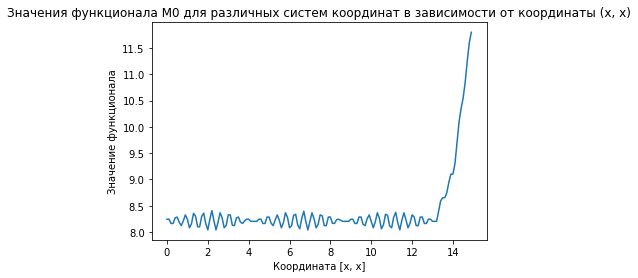

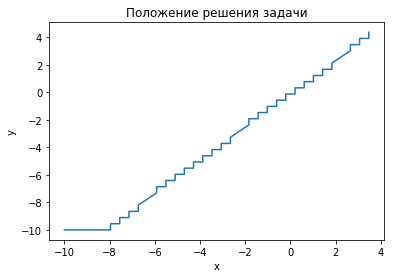

In [6]:
scale = np.array([
    [1, 0],
    [0, 1]
])
fi = 0
shift = np.arange(0, 15, 0.1)
metric_number = 0
x = []
y = []
metric = []
for shift_ in shift:
    opt_metric, opt_x, opt_y = calculate_metrics(scale, np.array([shift_, shift_]), rotate, fi, metric_number=metric_number, draw=False);    
    metric.append(opt_metric)
    x.append(opt_x)
    y.append(opt_y)
plt.figure()
plt.plot(shift, metric)
plt.xlabel('Координата [x, x]')
plt.ylabel('Значение функционала')
plt.title('Значения функционала M0 для различных систем координат в зависимости от координаты (x, x)')
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Положение решения задачи');

Интересный эффект наблюдается варьировании параметра смещения. Мы наблюдаем резкий скачок функции в районе $[15, 15]$. Из-за чего это происходит, я не установил.

Последний эксперимент для деформации по оси x:

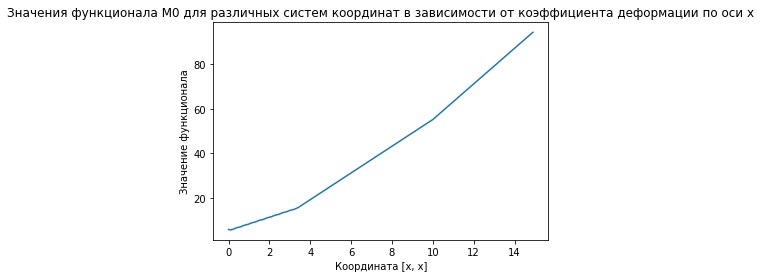

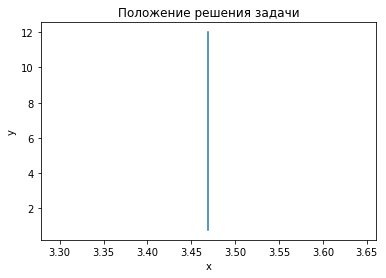

In [7]:
scale_lambda = lambda x: np.array([
    [x, 0],
    [0, 1]
])
scale = [scale_lambda(x) for x in np.arange(0, 15, 0.1)]
fi = 0
shift = np.array([0, 0])
metric_number = 0
x = []
y = []
metric = []
for scale_ in scale:
    opt_metric, opt_x, opt_y = calculate_metrics(scale_, shift, rotate, fi, metric_number=metric_number, draw=False);    
    metric.append(opt_metric)
    x.append(opt_x)
    y.append(opt_y)
plt.figure()
plt.plot( np.arange(0, 15, 0.1), metric)
plt.xlabel('Координата [x, x]')
plt.ylabel('Значение функционала')
plt.title('Значения функционала M0 для различных систем координат в зависимости от коэффициента деформации по оси x')
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Положение решения задачи');

Среди оставшихся функционалов, проведём эксперимент для $M_3$:

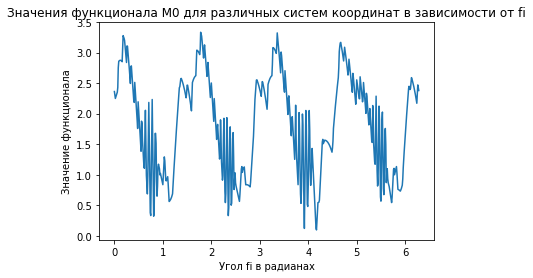

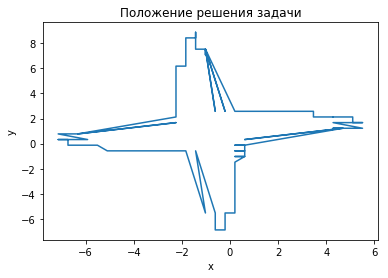

In [8]:
scale = np.array([
    [1, 0],
    [0, 1]
])
fi = np.arange(0, 2 * np.pi, 0.01)
shift = np.array([0, 0])
metric_number = 3
x = []
y = []
metric = []
for fi_ in fi:
    opt_metric, opt_x, opt_y = calculate_metrics(scale, shift, rotate, fi_, metric_number=metric_number, draw=False);
    metric.append(opt_metric)
    x.append(opt_x)
    y.append(opt_y)
plt.figure()
plt.plot(fi, metric)
plt.xlabel('Угол fi в радианах')
plt.ylabel('Значение функционала')
plt.title('Значения функционала M0 для различных систем координат в зависимости от fi')
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Положение решения задачи');

In [9]:
from scipy.spatial import ConvexHull
data = np.array([
   [0.89923505, 0.12738528],
   [0.16981513, 0.46002402],
   [0.44587796, 0.88951946],
   [0.53016572, 0.44509134],
   [0.33618831, 0.06512534],
   [0.71824832, 0.76336721],
   [0.00265801, 0.12967724],
   [0.46830979, 0.66519829],
   [0.06973677, 0.54328343],
   [0.5600197 , 0.92362259],
   [0.97014362, 0.0338404 ],
   [0.34358591, 0.24669863],
   [0.28544579, 0.34593918],
   [0.66517055, 0.98975264],
   [0.65405907, 0.31582984]
])

# Ограничения на оси
min_x = -2
min_y = -2
max_x = 2
max_y = 2
count_x = 350
count_y = 350

# Функционалы
d2 = 2.
metrics = [
    lambda x, y, data: np.sum(np.abs(data[:, 0] - x)  + np.abs(data[:, 1] - y)),
    lambda x, y, data: np.sum((np.abs(data[:, 0] - x) ** d2 + np.abs(data[:, 1] - y) ** d2)**(1./d2)),
    lambda x, y, data: np.sum(np.max(
        np.vstack([
            np.abs(data[:, 0] - x), 
            np.abs(data[:, 1] - y),
        ]), axis=1
    )),
    lambda x, y, data: np.sum(np.abs(data[:, 0] - x) * np.abs(data[:, 1] - y)),
]
rotate = lambda fi: np.array([
    [np.cos(fi), -np.sin(fi)],
    [np.sin(fi), np.cos(fi)]
])

# Подсчёт и отрисовка
def calculate_metrics(scale, shift, rotate, fi, metric_number, draw):
    data_ = np.dot(np.dot(data - shift, rotate(fi)), scale)
    z = []
    for y in np.linspace(min_y, max_y, count_y):
        z.append([])
        for x in np.linspace(min_x, max_x, count_x):
            z[-1].append(metrics[metric_number](x, y, data_))
    x, y = np.meshgrid(np.linspace(min_x, max_x, count_x), np.linspace(min_y, max_y, count_y))
    
    if draw:
        plt.figure()
        plt.contour(x,y, np.array(z));
        plt.plot(data_[:, 0], data_[:, 1], 'rx')
        plt.plot(0, 0, 'bo')
        plt.title(
            'Линии уровня для функционала M%d\n при\nfi=%.2f,\nshift=[%.2f, %.2f],\nscale=[\n[%.2f %.2f],\n[%.2f %.2f]\n]' %
            (
                metric_number, 
                fi,
                shift[0], shift[1],
                scale[0, 0], scale[0, 1], scale[1, 0], scale[1, 1]
            )
        )
        plt.legend(['Выборка', 'Нуль'])
    z = np.array(z)
    opt_x, opt_y = np.where(z == np.min(z))
    opt_x, opt_y = opt_x[0], opt_y[0]
    return np.min(z), x[0][opt_x], y[opt_y][0]

Исследуем вопрос соотношения различных решений. 

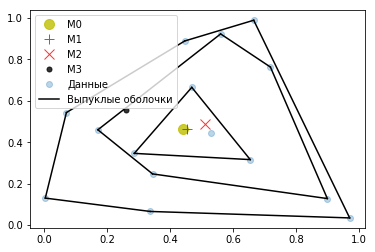

In [11]:
plt.figure()
scale = np.array([
    [1, 0],
    [0, 1]
])
fi = 0
shift = np.array([0, 0])
_, opt_x0, opt_y0 = calculate_metrics(scale, shift, rotate, fi, metric_number=0, draw=False);
plt.plot(opt_x0, opt_y0, 'yo', alpha=0.8, markersize=10)
_, opt_x1, opt_y1 = calculate_metrics(scale, shift, rotate, fi, metric_number=1, draw=False);
plt.plot(opt_x1, opt_y1, 'g+', alpha=0.8, markersize=10);
_, opt_x2, opt_y2 = calculate_metrics(scale, shift, rotate, fi, metric_number=2, draw=False);
plt.plot(opt_x2, opt_y2, 'rx', alpha=0.8, markersize=10);
_, opt_x3, opt_y3 = calculate_metrics(scale, shift, rotate, fi, metric_number=3, draw=False);
plt.plot(opt_x3, opt_y3, 'k.', alpha=0.8, markersize=10);

plt.plot(data[:,0], data[:,1], 'o', alpha=0.3)
data_ = data
while len(data_) > 2:
    hull = ConvexHull(data_)
    drop = []
    for simplex in hull.simplices:
        plt.plot(data_[simplex, 0], data_[simplex, 1], 'k-')
        drop.append(simplex[0])
        drop.append(simplex[1])
    mask = np.array([False] * len(data_))
    mask[drop] = True
    data_ = data_[~mask]

plt.legend(['M0', 'M1', 'M2', 'M3', 'Данные', 'Выпуклые оболочки']);

Как видим, оценка максимума ($M_2$) даёт наилучше приближение медианы, построенной при помощи выпуклых оболочек (именно её мы приняли за эталон). При этом, все оценки, судя по всему, дают неплохое приближение для медианы, если считать, что точка должна принадлежать выборке.

Отметим, что все точки находятся на соизмеримых расстояниях, а это означает, что все определения медианы, кроме $M_3$ разумны.

# Исследование алгоритма Шурыгина

Меня заинтересовал алгоритм Шурыгина. Представляю ресерч на тему.

Рассмотрим алгоритм Шурыгина. Описание алгоритма есть [здесь](https://github.com/Dyakonov/PZAD/blob/master/PZAD2018_01_probweights_06.pdf)

In [12]:
def shurigin_algorithm(x, draw=False, noise=np.array([]), xlim=[]):
    x = list(x) + list(noise)
    mean = np.mean(x)
    i = 0
    if draw:
        plt.figure(figsize=(10, 7))
        plt.plot(0.5, len(x)-1, 'ko')
        plt.plot(mean, len(x)-1, 'co')
    while len(x) >= 2:
        if draw:
            plt.plot(x, [i] * len(x), 'rx')
        i += 1
        x = sorted(x)
        mid = (x[0] + x[-1]) / 2.
        if mid < x[1]:
            x = x[1:]
        elif mid > x[-2]:
            x = x[:-1]
        else:
            x = x[1:-1]
            x.append(mid)
        if draw:
            plt.plot(np.mean(x), i, 'bo')
    if draw:
        plt.title('Работа алгоритма Шурыгина')
        plt.xlabel('Выборка')
        plt.ylabel('Номер шага')
        plt.legend(['Точное значение среднего', 'Среднее значение выборки', 'Состояние выборки на i-м шаге', 'Значение среднего на i-м шаге'])
    if len(xlim) != 0 and draw:
        plt.xlim(xlim)
    return mean, np.mean(x)

Будем моделировать равномерное распределение и наблюдать за сходимостью алгоритма. При этом будем добавлять равномерный шум с различными параметрами

Алгоритм Шурыгина: 0.696719, Среднее: 11.977078


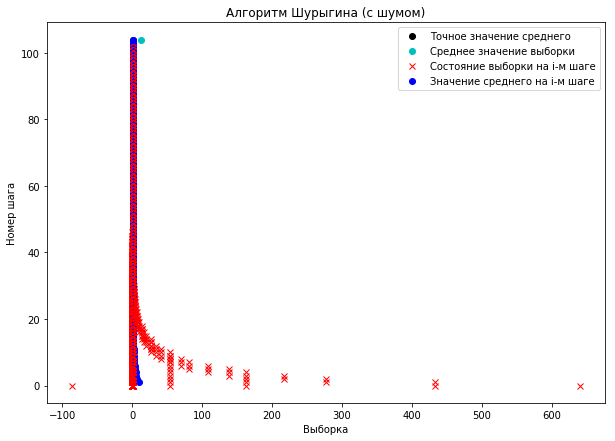

In [13]:
n = 100
variance = 1000
shift = 0.1
seed = 12
n_noise = 5
np.random.seed(seed)
noise = (np.random.rand(n_noise) - shift) * variance
xlim = []
mean, s_mean = shurigin_algorithm(np.random.rand(n), draw=True, noise=noise, xlim=xlim)
plt.title('Алгоритм Шурыгина (с шумом)')
print('Алгоритм Шурыгина: %f, Среднее: %f' % (s_mean, mean))

Как видим, при наличии 5% шума, можем иметь хорошую оценку среднего.

Будем моделировать равномерное распределение и наблюдать за сходимостью алгоритма. Шум добавлять не будем. Эксперименты показывают, что алгоритм сходится к среднему

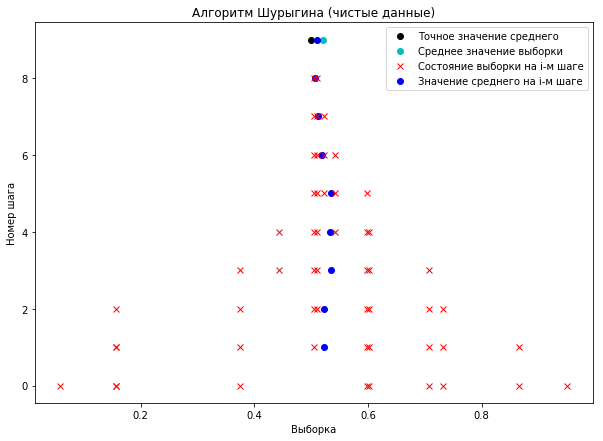

In [14]:
np.random.seed(42)
shurigin_algorithm(np.random.rand(10), draw=True)
plt.title('Алгоритм Шурыгина (чистые данные)');

Проведём эксперименты на предмет устойчивости к шуму. Будем брать равномерный шум на интервале `[-200; 800]`. Построим зависимость числа шумовых точек от величины среднего. Как можно наблюдать, при увеличении числа шумовых точек, значение среднего растёт. Растёт и значение для алгоритма Шурыгина. При малых долях шумовых точек, ошибка растёт как $err(p) = 0.1p$, где $p$ -- число шумовых точек

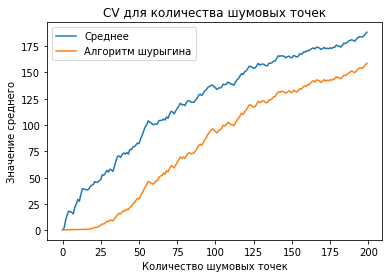

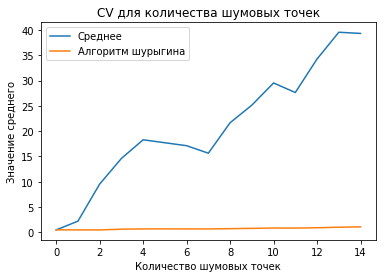

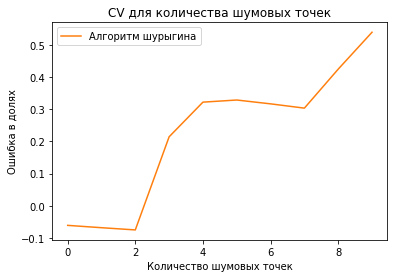

In [15]:
count_experiments = 40
n = 100
variance = 1000
shift = 0.2
seed = 42
mean = []
s_mean = []
for n_noise in range(0, 2 * n):
    mean_m = []
    s_mean_m = []
    for i in range(count_experiments):
        np.random.seed(seed)
        noise = (np.random.rand(n_noise) - shift) * variance
        xlim = []
        mean_, s_mean_ = shurigin_algorithm(np.random.rand(n), draw=False, noise=noise)
        mean_m.append(mean_)
        s_mean_m.append(s_mean_)
    mean.append(np.mean(mean_m))
    s_mean.append(np.mean(s_mean_m))
plt.figure()
plt.plot(mean)
plt.plot(s_mean)
plt.title('CV для количества шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Значение среднего')
plt.legend(['Среднее', 'Алгоритм шурыгина'])
plt.figure()
plt.plot(mean[:15])
plt.plot(s_mean[:15])
plt.title('CV для количества шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Значение среднего')
plt.legend(['Среднее', 'Алгоритм шурыгина'])
plt.figure()
plt.plot((np.array(s_mean[:10]) - 0.5) / 0.5, color='C1')
plt.title('CV для количества шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Ошибка в долях')
plt.legend(['Алгоритм шурыгина']);

Следует отметить, что алгоритм по-прежнему продолжает сходиться при "правых" и "левых" выбросах. 

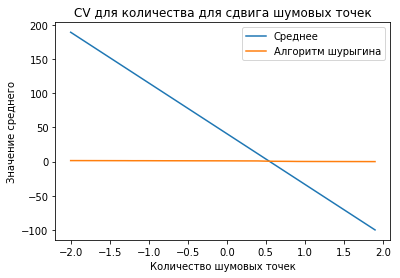

In [16]:
count_experiments = 40
n = 100
variance = 1000
shift = 0.2
n_noise = 8
seed = i
mean = []
s_mean = []
for shift in np.arange(-2, 2, 0.1):
    mean_m = []
    s_mean_m = []
    for i in range(count_experiments):
        np.random.seed(seed)
        noise = (np.random.rand(n_noise) - shift) * variance
        xlim = []
        mean_, s_mean_ = shurigin_algorithm(np.random.rand(n), draw=False, noise=noise)
        mean_m.append(mean_)
        s_mean_m.append(s_mean_)
    mean.append(np.mean(mean_m))
    s_mean.append(np.mean(s_mean_m))
plt.figure()
plt.plot(np.arange(-2, 2, 0.1), mean)
plt.plot(np.arange(-2, 2, 0.1), s_mean)
plt.title('CV для количества для сдвига шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Значение среднего')
plt.legend(['Среднее', 'Алгоритм шурыгина']);

**Замечание**. Отметим, что алгоритм плохо обобщается на многомерный случай. При этом, при решении задач, его можно использовать как детектор аномалий: если значение среднего сильно отличается от результата работы алгоритма Шурыгина, то необходима чистка данных.

# Оценка минимального контраста

Согласно книге ["А.И. Орлов Теория принятия решений", 2004"](http://www.aup.ru/books/m157/2_3_5.htm), ["Прикладная статистика: оценивание, робастность, прогноз. Шурыгин"], оценкой минимального контраста называется решение оптимизационной задачи вида:

$\theta^* = \arg\min{\sum\limits_{0 \leq i < n}} f(x_i, \theta), \theta \in \Theta$

Причём считается, что все случайные величины $x_i$ одинаково распределены и независимы. Например, $f(x_i, \theta) = -\ln p(x|\theta)$, где $p$ -- плотность распределения, укладывается в определение минимального контраста. При этом, решение задачи сводится к методу макс. правдоподобия.

Проделаем несколько шагов и получим алгоритм, который позволяет найти одно из решений уравнения итеративным способом (вопрос сходимости остаётся открытым для меня) для функции $f$ специального вида $f(x_i-a)$. Будем проделывать данные выкладки для одномерного случая. Запишем критерий минимума:

$\sum\limits_{0 \leq i \leq n} f(x_i-a) = 0$

Тогда, возьмём производную по $a$ и сделаем следующее преобразование:

$\dfrac{\partial\sum\limits_{0 \leq i < n} f(x_i-a)}{\partial a} = \sum\limits_{0 \leq i < n} \gamma(x_i - a)\xi(x_i-a) = 0$

Часто это представляется в виде:

$\gamma(x_i - a)\xi(x_i-a) = C \cdot (x_i - a)\xi(x_i-a)$, где $С$ -- константа


Интуиция у этого преобразования следующая. Пусть функция $f(x_i-a)$ содержит в себе нелинейную функцию $\gamma(x_i-a)$. Например, часто это может быть $\gamma(x_i-a)=(x_i-a)^2$, причём $f(x_i-a) = -\dfrac{1}{\lambda}\exp\big(-\lambda\dfrac{(x_i-a)^2}{2}\big)$. Тогда, очевидно, что $\dfrac{\partial\gamma(x_i-a)}{\partial x_i} = 2(x_i-a)$. В таком случае, множитель $(x_i-a)$ вынесется перед производной от сложной функции, т.е. перед $\xi(x_i-a)$. В таком случае, получаем:

$\gamma(x_i - a)\xi(x_i-a) = C \cdot (x_i - a)\xi(x_i-a)$.

Для случая функции Мешалкина, будет:

$\gamma(x_i - a)\xi(x_i-a) = (x_i - a)\exp\big(-\lambda\dfrac{(x_i-a)^2}{2}\big)$

### Итеративный алгоритм для случая $\gamma(x-a) = 2(x_i - a)$

Запишем целевой функционал

$\dfrac{\partial\sum\limits_{0 \leq i < n} f(x_i-a)}{\partial a} = \sum\limits_{0 \leq i < n} 2(x_i-a)\xi(x_i-a) = 0$

Тогда можем решить данное уравнение.

$\sum\limits_{0 \leq i < n} 2(x_i-a)\xi(x_i-a) = 0$

$\sum\limits_{0 \leq i < n} x_i\xi(x_i-a)-\sum\limits_{0 \leq i < n}a\xi(x_i-a) = 0$

$a\sum\limits_{0 \leq i < n}\xi(x_i-a)  = \sum\limits_{0 \leq i < n} x_i\xi(x_i-a)$

$a  = \dfrac{\sum\limits_{0 \leq i < n} x_i\xi(x_i-a)}{\sum\limits_{0 \leq i < n}\xi(x_i-a)}$

Если сделать замену, то получим весовую схему

$a  = \sum\limits_{0 \leq i < n} x_i\cdot w_i,$ где $w_i=\dfrac{\xi(x_i-a)}{\sum\limits_{0 \leq j < n}\xi(x_j-a)}$

Но, как видно, веса зависят от среднего. В таком случае, можно сказать, что веса должны зависеть не от среднего, а от некоторой оценки среднего. Вслед за этим, можно показать, что в таком случае, взвещеная сумма будут сходиться прямо к оптимальному значению функционала, если

$a_{k+1}  = \sum\limits_{0 \leq i < n} x_i\cdot w_{ik},$ где $w_i=\dfrac{\xi(x_i-a_k)}{\sum\limits_{0 \leq j < n}\xi(x_j-a_k)}$ при $k \rightarrow \infty$

### Итеративное нахожение среднего

Рассмотрим теперь случай для итеративного нахождения минимума следующего функционала:
    
$\sum\limits_{0 \leq i \leq n} (x_i-a)^2 = 0$

